In [22]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats
import tensorboard as tb
from gfrl.common.mybase.logger import read_tb

In [30]:
import pandas
import numpy as np
from glob import glob
#import tensorflow as tf
import tensorflow.compat.v2 as tf
import os.path as osp
from collections import defaultdict

In [37]:
path = "/Users/azadsalam/gdrive_berkeley/sc4rl_data/final_results/ppo/offense/avoid_pass_shoot_1/tb"

In [47]:
def read_tb_event(path):
    #for tf1 for summary in tf.train.summary_iterator("/path/to/log/file"):
    from tensorflow.python.summary.summary_iterator import summary_iterator #for tf2

    if osp.isdir(path):
        fnames = glob(osp.join(path, "events.*"))
    elif osp.basename(path).startswith("events."):
        fnames = [path]
    else:
        raise NotImplementedError("Expected tensorboard file or directory containing them. Got %s"%path)

    tag2pairs = defaultdict(list)
    maxstep = 0
    for fname in fnames:

        for summary in summary_iterator(fname):
            if summary.step > 0:
                for v in summary.summary.value:
                    pair = (summary.step, v.simple_value)
                    tag2pairs[v.tag].append(pair)
                maxstep = max(summary.step, maxstep)
    data = np.empty((maxstep, len(tag2pairs)))
    data[:] = np.nan
    tags = sorted(tag2pairs.keys())
    for (colidx,tag) in enumerate(tags):
        pairs = tag2pairs[tag]
        for (step, value) in pairs:
            data[step-1, colidx] = value
    df_pandas =  pandas.DataFrame(data, columns=tags)
    
    return df_pandas

In [48]:
df_pandas = read_tb_event(path)

In [53]:
df_pandas

,_eval/ep_len_mean,_eval/reward_mean,_eval/score_mean,_train/ep_len_mean,_train/reward_mean,_train/score_mean,fps,loss/approxkl,loss/clipfrac,loss/policy_entropy,loss/policy_loss,loss/value_loss,misc/explained_variance,misc/nupdates,misc/serial_timesteps,misc/time_elapsed,misc/total_timesteps
0,101.746033,-0.031746,-0.031746,80.244186,-0.023256,-0.023256,223.0,6.102672e-07,0.000000,2.944438,-3.510132e-05,0.001126,0.107952,1.0,512.0,36.589920,8192.0
1,NaN,NaN,NaN,77.080002,-0.020000,-0.020000,407.0,7.717015e-07,0.000000,2.944434,-3.110874e-05,0.003386,0.065903,2.0,1024.0,56.857464,16384.0
2,NaN,NaN,NaN,95.120003,0.000000,0.000000,428.0,9.460421e-07,0.000000,2.944424,-3.094763e-05,0.001779,0.171275,3.0,1536.0,75.961334,24576.0
3,NaN,NaN,NaN,87.519997,-0.010000,-0.010000,429.0,9.429764e-07,0.000000,2.944411,-2.340881e-05,0.001085,0.366580,4.0,2048.0,95.044601,32768.0
4,NaN,NaN,NaN,126.139999,-0.030000,-0.030000,432.0,6.403012e-07,0.000000,2.944397,-2.512825e-07,0.001160,0.314841,5.0,2560.0,113.996658,40960.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
605,NaN,NaN,NaN,47.959999,0.540000,0.540000,328.0,8.757479e-04,0.019775,0.395339,5.465335e-04,0.024992,0.453211,606.0,310272.0,14261.011719,4964352.0
606,NaN,NaN,NaN,50.189999,0.450000,0.450000,333.0,6.525115e-04,0.019592,0.375677,1.608318e-04,0.024023,0.446189,607.0,310784.0,14285.603516,4972544.0
607,NaN,NaN,NaN,49.259998,0.470000,0.470000,342.0,6.983053e-04,0.015930,0.405099,7.896160e-04,0.021551,0.499684,608.0,311296.0,14309.509766,4980736.0
608,NaN,NaN,NaN,48.119999,0.520000,0.520000,333.0,1.989168e-04,0.006165,0.369061,2.167458e-05,0.023433,0.473096,609.0,311808.0,14334.082031,4988928.0


In [49]:

import seaborn as sns
sns.set_theme(style="darkgrid")

<AxesSubplot:xlabel='misc/total_timesteps', ylabel='_train/reward_mean'>

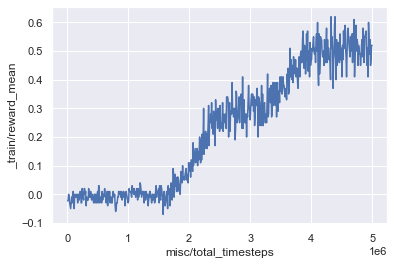

In [50]:
sns.lineplot(x="misc/total_timesteps", y="_train/reward_mean",
             data=df_pandas)

In [123]:
pre = "/Users/azadsalam/gdrive_berkeley/sc4rl_data/final_results/"
paths = [ f"{pre}ppo/offense/cross_easy_0/tb",
        f"{pre}ppo/offense/cross_easy_1/tb",
        f"{pre}ppo/offense/cross_easy_2/tb"]
         

In [124]:
dfs = [read_tb_event(path) for path in paths]

In [125]:
dfs[0]

,_eval/ep_len_mean,_eval/reward_mean,_eval/score_mean,_train/ep_len_mean,_train/reward_mean,_train/score_mean,fps,loss/approxkl,loss/clipfrac,loss/policy_entropy,loss/policy_loss,loss/value_loss,misc/explained_variance,misc/nupdates,misc/serial_timesteps,misc/time_elapsed,misc/total_timesteps
0,105.327866,0.04918,0.04918,111.181816,0.036364,0.036364,243.0,0.000002,0.000000,2.944438,-8.681248e-05,0.003314,0.007924,1.0,512.0,33.625919,8192.0
1,NaN,NaN,NaN,116.050003,0.040000,0.040000,474.0,0.000001,0.000000,2.944427,-7.244700e-06,0.003202,0.079777,2.0,1024.0,51.031937,16384.0
2,NaN,NaN,NaN,116.430000,0.100000,0.100000,508.0,0.000001,0.000000,2.944417,-4.430063e-05,0.003309,0.151262,3.0,1536.0,67.156868,24576.0
3,NaN,NaN,NaN,112.360001,0.060000,0.060000,489.0,0.000002,0.000000,2.944400,-2.640896e-05,0.005157,0.173874,4.0,2048.0,83.897652,32768.0
4,NaN,NaN,NaN,128.600006,0.020000,0.020000,506.0,0.000002,0.000000,2.944377,-3.381494e-05,0.004265,0.218141,5.0,2560.0,100.069756,40960.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
605,NaN,NaN,NaN,22.549999,0.740000,0.740000,290.0,0.001590,0.033325,0.985193,1.431999e-03,0.028109,0.676165,606.0,310272.0,14416.429688,4964352.0
606,NaN,NaN,NaN,32.810001,0.730000,0.730000,293.0,0.001323,0.039062,1.209370,7.945774e-04,0.027772,0.678726,607.0,310784.0,14444.383789,4972544.0
607,NaN,NaN,NaN,30.230000,0.640000,0.640000,290.0,0.000486,0.011719,1.056527,-9.177893e-07,0.026498,0.677903,608.0,311296.0,14472.552734,4980736.0
608,NaN,NaN,NaN,34.980000,0.690000,0.690000,302.0,0.000463,0.010376,1.042475,-2.351193e-04,0.023867,0.706596,609.0,311808.0,14499.602539,4988928.0


In [126]:
exs = [df[["misc/total_timesteps", "_train/score_mean"]].copy() for df in dfs]

In [127]:
for i, ex in enumerate(exs):
    ex["trial"] = i

In [128]:
comb = pd.concat(exs)

In [146]:
comb

,misc/total_timesteps,_train/score_mean,trial
0,8192.0,0.036364,0
1,16384.0,0.040000,0
2,24576.0,0.100000,0
3,32768.0,0.060000,0
4,40960.0,0.020000,0
...,...,...,...
605,4964352.0,0.710000,2
606,4972544.0,0.660000,2
607,4980736.0,0.700000,2
608,4988928.0,0.720000,2


In [147]:
#comb[comb["trial"]==1] 

In [148]:
#comb_wide = comb.pivot("misc/total_timesteps", "trial", "_train/score_mean")

In [149]:
#comb_wide

<AxesSubplot:xlabel='misc/total_timesteps', ylabel='_train/score_mean'>

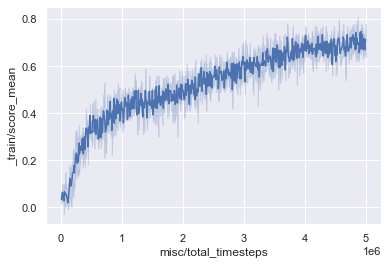

In [150]:
sns.lineplot(data=comb, x="misc/total_timesteps", y="_train/score_mean")

In [153]:
#sns.lineplot(data=comb, x="misc/total_timesteps", y="_train/score_mean", hue="misc/total_timesteps")

In [188]:
pre = "/Users/azadsalam/gdrive_berkeley/sc4rl_data/final_results/"
resd = { "cross_easy":  [f"{pre}ppo/offense/cross_easy_0/tb", f"{pre}ppo/offense/cross_easy_1/tb", f"{pre}ppo/offense/cross_easy_2/tb"],
        "cross_hard": [f"{pre}ppo/offense/cross_hard_0/tb", f"{pre}ppo/offense/cross_hard_1/tb", f"{pre}ppo/offense/cross_hard_2/tb"],
        "avoid_pass_shoot": [f"{pre}ppo/offense/avoid_pass_shoot_0/tb", f"{pre}ppo/offense/avoid_pass_shoot_1/tb", f"{pre}ppo/offense/avoid_pass_shoot_2/tb"],
        "offense_11v1": [f"{pre}ppo/offense/fg_11v1_0/tb", f"{pre}ppo/offense/fg_11v1_1/tb"]
        }
#f"{pre}ppo/offense/fg_11v1_2_err/tb"

In [189]:
combd = {}
for scenario, paths in resd.items():
    dfs = [read_tb_event(path) for path in paths]
    exs = [df[["misc/total_timesteps", "_train/score_mean"]].copy() for df in dfs]
    for i, ex in enumerate(exs):
        ex["trial"] = i
        ex["scenario"] = scenario
    comb = pd.concat(exs)
    combd[scenario] = comb

In [190]:
comball = pd.concat(combd)

In [191]:
comball

misc/total_timesteps  _train/score_mean  trial      scenario
cross_easy   0                  8192.0           0.036364      0    cross_easy
             1                 16384.0           0.040000      0    cross_easy
             2                 24576.0           0.100000      0    cross_easy
             3                 32768.0           0.060000      0    cross_easy
             4                 40960.0           0.020000      0    cross_easy
...                                ...                ...    ...           ...
offense_11v1 605             4964352.0           0.000000      1  offense_11v1
             606             4972544.0           0.000000      1  offense_11v1
             607             4980736.0           0.000000      1  offense_11v1
             608             4988928.0           0.000000      1  offense_11v1
             609             4997120.0           0.010000      1  offense_11v1

[6710 rows x 4 columns]

<AxesSubplot:xlabel='misc/total_timesteps', ylabel='_train/score_mean'>

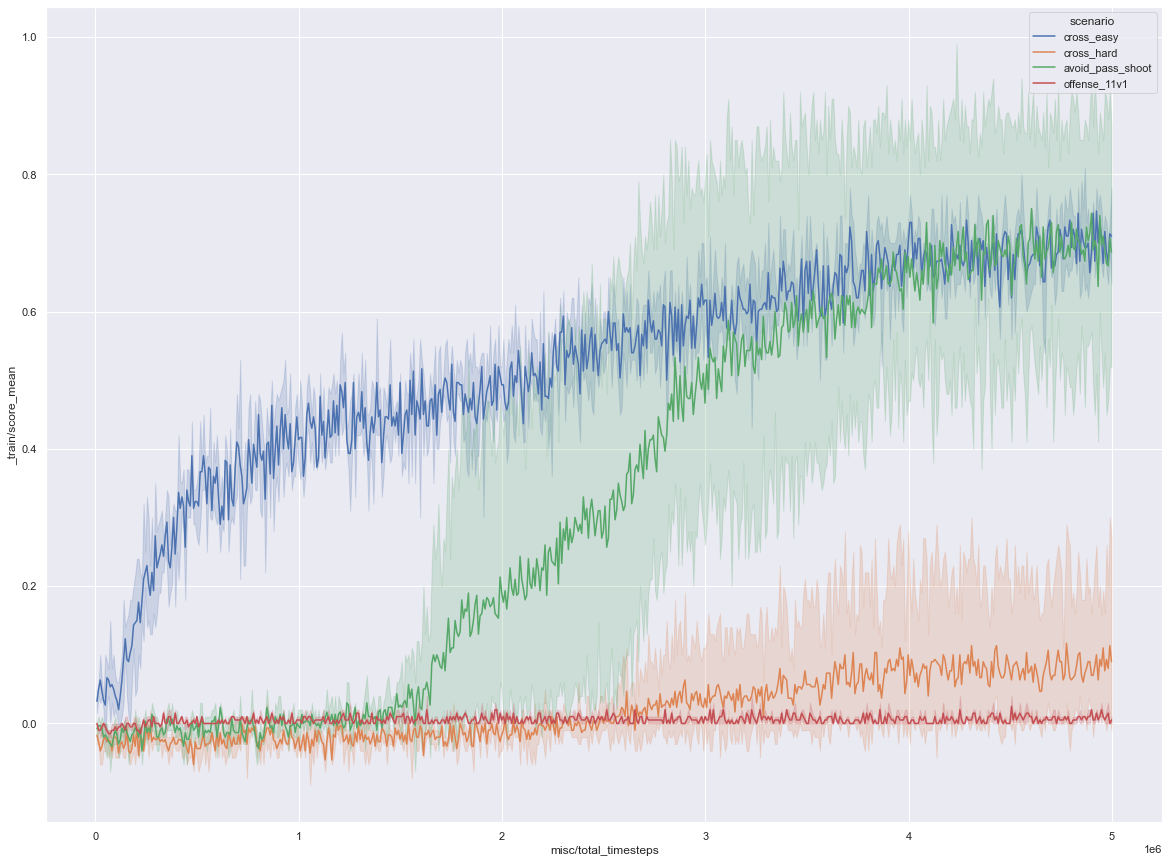

In [194]:
from matplotlib import pyplot
pyplot.figure(figsize=(20, 15))
sns.lineplot(data=comball, x="misc/total_timesteps", y="_train/score_mean", hue="scenario")